#  <span style="color:#9400D3;text-decoration:overline;font-weight:bold"><u> AIML Module Project - FEATURISATION & MODEL TUNING</u></span>

# <span style="color:#9400D3">PROJECT BASED    

**CONTEXT:** A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.


**DATA DESCRIPTION:** sensor-data.csv : (1567, 592)
The data consists of 1567 examples each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.


**PROJECT OBJECTIVE:** We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

**Steps and tasks:**
1. Import and explore the data.
<br><br>
2. Data cleansing:
 * Missing value treatment.
 * Drop attribute/s if required using relevant functional knowledge.
 * Make all relevant modifications on the data using both functional/logical reasoning/assumptions.
<br><br>
3. Data analysis & visualisation:
 * Perform detailed relevant statistical analysis on the data.
 * Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
<br><br>
4. Data pre-processing:
 * Segregate predictors vs target attributes
 * Check for target balancing and fix it if found imbalanced.
 * Perform train-test split and standardise the data or vice versa if required.
 * Check if the train and test data have similar statistical characteristics when compared with original data.
<br><br>
5. Model training, testing and tuning:
  * Model training:
       - Pick up a supervised learning model.
       - Train the model.
       - Use cross validation techniques.<br>
         **Hint:** Use all CV techniques that you have learnt in the course.        
         <br>
       - Apply hyper-parameter tuning techniques to get the best accuracy. Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
       - Use any other technique/method which can enhance the model performance.<br>
         **Hint:** Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.<br>
       - Display and explain the classification report in detail.
       - Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to new train and test accuracies.<br>
         **Hint:** You can use your concepts learnt under Applied Statistics module.<br>
       - Apply the above steps for all possible models that you have learnt so far.
 * Display and compare all the models designed with their train and test accuracies.
 * Select the final best trained model along with your detailed comments for selecting this model.
 * Pickle the selected model for future use.
 * Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.
<br><br>
6. Conclusion and improvisation:
 * Write your conclusion on the results.

### <span style="color:#9400D3">Importing Required Python Modules and Libraries
  Here we are importing all the Libraries and Modules that are needed for whole project in a single cell.

In [1]:
# Libraries for Basic Process 
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Pre-setting Plot Style
font={'size':15}
plt.rc('font', **font)
plt.rc('xtick',labelsize=12)    
plt.rc('ytick',labelsize=12)
sns.set_style({'xtick.bottom':True,'ytick.left':True,'text.color':'#9400D3',
               'axes.labelcolor': 'blue','patch.edgecolor': 'black'})

# sklearn Modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

# Supporting Modules and Libraries
from imblearn.over_sampling import SMOTE
import pickle 

from scipy.stats import skew
from scipy.stats import ttest_ind

# Module to Suppress Warnings
from warnings import filterwarnings
filterwarnings('ignore') 

***
## <span style="color:#9400D3">1. Import and Explore the Data.
   * We used file "signal-data.csv", so there is only one file to operate.
   * If the file fails to load, then a quick check for file name is needed. Make sure that original file name matches with the name which is coded below.
   * The file is in CSV format, if format of original file changes then error in loading files will appear.

In [2]:
# Loading the files and creating dataframes
signal = pd.read_csv('signal-data.csv')

# Getting Shape and Size of each data
S = signal.shape

# Displaying Dataset
print('\033[1m\nSignal Dataset consist:-\033[0m\n Number of Rows    =',S[0],'\n Number of Columns =',S[1])
display(signal.head())


Signal Dataset consist:-
 Number of Rows    = 1567 
 Number of Columns = 592


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


***
**Key Observations:-**
* Dataset has 1567 rows and 592 columns.
* We can observe some NaN values in it.
***


## <span style="color:#9400D3">2. Data Cleansing:

### <span style="color:#9400D3"> * Missing Value Treatment:

### Checking for Null Values in the Attributes

In [3]:
# Checking for Null Values in the Attributes
print('\n\033[1mNull Values in the Features:-')
display(signal.isnull().sum().to_frame('Null Values'))


Null Values in the Features:-


,Null Values
Time,0
0,6
1,7
2,14
3,14
...,...
586,1
587,1
588,1
589,1


***
**Key Observations:-**
* We found Null values in the data. Now we have to replace it by Median Values of the attributes respectively.
***

### Replacing Null Values of the Attributes by their Median values

In [4]:
# Replacing Null Values by Median
signal = signal.fillna(signal.median())

# Checking for Null Values in the Attributes after Replacement
print('\n\033[1mNull Values in the Features after Replacement:-')
display(signal.isnull().sum().to_frame('Null Values'))


Null Values in the Features after Replacement:-


,Null Values
Time,0
0,0
1,0
2,0
3,0
...,...
586,0
587,0
588,0
589,0


***
**Key Observations:-**
* Null values are replaced by their median value of the attributes.
***

### <span style="color:#9400D3"> * Drop Attribute/s If Required using relevant Functional Knowledge
    
* Since Time Attribute is not important data and doesn't give much information, we can drop it.

In [5]:
# Dropping Time Attribute
signal.drop(['Time'],axis=1,inplace=True)
  
# Getting Shape and Size of dataset
S = signal.shape

# Displaying the Dataset after dropping Time Attribute
print('\033[1mDataset consist:-\033[0m\n Number of Rows    =',S[0],'\n Number of Columns =',S[1],'\n\n\033[1mDataset:-\033[0m')
display(signal.head())

Dataset consist:-
 Number of Rows    = 1567 
 Number of Columns = 591 

Dataset:-


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


***
**Key Observations:-**
* Time Attribute has been dropped.
***

### <span style="color:#9400D3"> * Make All Relevant Modifications on the Data using both Functional/Logical Reasoning/Assumptions.

### Checking Data Types of Attributes

In [6]:
# Getting Data type of each Attribute
DT = signal.dtypes.to_frame('Data Type')
DT.index.name = 'Quantitative Attributes'

# Displaying Data type of Attributes
print('\n\033[1mData Types of Attributes:-')
display(DT)

print('________________________________________')
# Checking Data types Other than float64
x=1
for i in signal.columns:
    if signal[i].dtypes != 'float64':
        print('\n\033[1mQuick Check for Data types:-')  
        print('\n\033[1m Data types other than float64:-\n',x,signal[i].dtypes)
        x+=1
print('________________________________________')


Data Types of Attributes:-


,Data Type
Quantitative Attributes,
0,float64
1,float64
2,float64
3,float64
4,float64
...,...
586,float64
587,float64
588,float64


________________________________________

Quick Check for Data types:-

 Data types other than float64:-
 1 int64
________________________________________


***
**Key Observations:-**
* As we can observe in the above table we have int64 data type for Pass/Fail attribute.
* The same can be observed in quick check for datatypes, there is only one datatypes that is int64.
* Hence there is no change needed for data types of attributes.
***

### Checking If all Elements in an Attribute are Identical
* If all the recorded values are same then that data is not useful, since it doesn't make any impact on other correlated datas.
* Hence we can skip those datas or attributes which have identical/same values in them.

In [7]:
# Getting Attributes which has identical values
identical_clms = []
for i in signal.columns:
    if all(x==signal[i][0] for x in signal[i]) == True:
        identical_clms.append(i)

# Displaying Attributes which has identical values
print('\n\033[1mTotal Identical Attributes =',len(identical_clms))
print('\n\033[1mAttributes with Identical Values:-')
display(signal[identical_clms].head(10))


Total Identical Attributes = 116

Attributes with Identical Values:-


Quantitative Attributes,5,13,42,49,52,69,97,141,149,178,...,529,530,531,532,533,534,535,536,537,538
0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***
**Key Observations:-**
* We got 116 columns which has same or identical values in it.
* These attributes do not contribute much information in terms of variety.
* Hence we can drop them.
***

### Dropping Attributes with identical values

In [8]:
# Dropping Time Attribute
signal.drop(identical_clms,axis=1,inplace=True)

# Getting Shape and Size of dataset
S = signal.shape

# Displaying the Dataset after dropping Time Attribute
print('\033[1mDataset consist:-\033[0m\n Number of Rows    =',S[0],'\n Number of Columns =',S[1],'\n\n\033[1mDataset:-\033[0m')
display(signal.head())

Dataset consist:-
 Number of Rows    = 1567 
 Number of Columns = 475 

Dataset:-


Quantitative Attributes,0,1,2,3,4,6,7,8,9,10,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


***
**Key Observations:-**
* All attributes having identical values are dropped.
* Now our data is ready for further analysis.
***

## <span style="color:#9400D3">3. Data Analysis & Visualisation:

### <span style="color:#9400D3"> * Perform detailed relavant Statistical Analysis on the Data.
  * Statistical Analysis used to describe, show or summarize data from a sample in a meaningful way.
   
### Brief Summary of Target Data

In [9]:
# Describing the Target data interms of count, mean, standard deviation, and 5 point summary
print('\n\033[1mBrief Summary of Target Data:-')
display(signal['Pass/Fail'].describe().to_frame())


Brief Summary of Target Data:-


,Pass/Fail
count,1567.000000
mean,-0.867262
std,0.498010
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


### Checking Skewness of theTarget attribute

In [10]:
# Checking skewness
print('\033[1m\nSkewness of Target Attribute:-')  
display(signal['Pass/Fail'].skew())


Skewness of Target Attribute:-


3.4873590150894103

### **Checking Variance of the Target attribute**

In [11]:
# Checking Variance
print('\033[1m\nVariance of Target attribute:-')   
display(signal['Pass/Fail'].var())


Variance of Target attribute:-


0.24801440306577446

***
**Key Observations:-**
* We can observe some skewness in the data.
* There is low variance in the target data.
***

### <span style="color:#9400D3"> * Perform a Detailed Univariate, Bivariate and Multivariate Analysis with Appropriate detailed comments after Each Analysis.

### <u> Univariate Analysis</u>
Univariate analysis is the simplest form of analyzing data. It involves only one variable.

### Target Attribute Pass/Fail

In [12]:
# Checking Value Counts of Target Attribute
print('\033[1mTable Showing Total Observations of each section:-')
TAC = signal['Pass/Fail'].value_counts().to_frame('Total Observations')
display(TAC)

Table Showing Total Observations of each section:-


,Total Observations
-1,1463
1,104


Plot Showing Frequency Distribution of Target Attribute:-


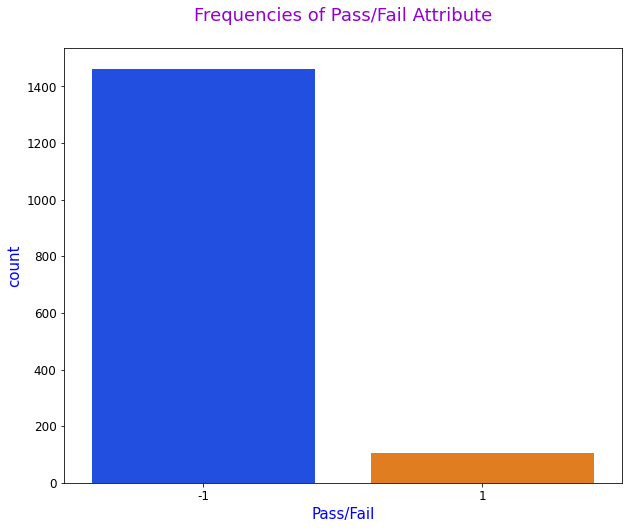


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of Pass/Fail feature:-



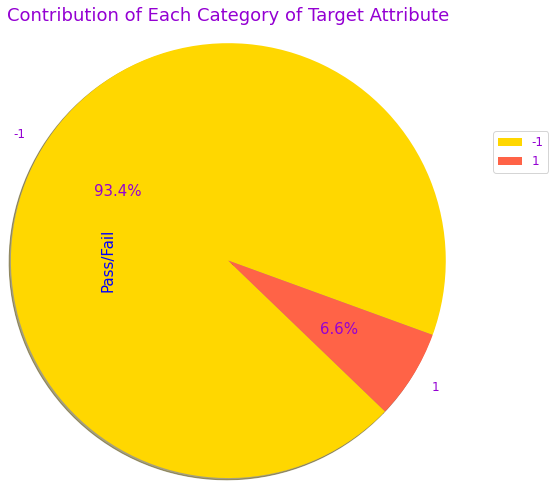

In [13]:
# Plotting Frequency Distribution of Target attribute
colors = ['gold','tomato']
print(f'\033[1mPlot Showing Frequency Distribution of Target Attribute:-')
plt.figure(figsize=(10,8))
plt.title(f'Frequencies of Pass/Fail Attribute\n')
sns.countplot(signal['Pass/Fail'],palette='bright');
plt.show()
print('\n___________________________________________________________________________________')
print('')
    
# Plotting Pie Chart to check contribution of Target attribute
print(f'\033[1m\nPie Chart Showing Contribution of Each Category of Pass/Fail feature:-\n')
plt.title(f'Contribution of Each Category of Target Attribute\n\n\n\n\n\n')
signal['Pass/Fail'].value_counts().plot.pie(radius=2.5, shadow=True, autopct='%1.1f%%', colors=colors, startangle=-20);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
plt.show()

***
**Key Observations:-**
* We can observe that, 1463 pass yield in house line testing, and 104 fails.
* There is imbalance in target attribute.
***

## <span style="color:#9400D3">4. Data Pre-Processing:

### Outlier Analysis

* Outlier Analysis is a process that involves identifying the anomalous observation in the dataset.”
* An outlier is an observation that lies an abnormal distance from other values in the attribute of dataset.
* Since we have few outliers or extreme values, we will replace them by their respective mean of attribute.
* Since outliers in Categorical features doesn't give any meaning, we are neglecting them.
* Hence this analysis is only for Discrete Features.

NOTE:- Here we are Replacing Outliers by Mean of the Attribute without outliers. That is we will calculate Mean without outliers and then replace outliers with this calculated Mean

In [14]:
# Getting Outliers and Imputing Outliers by Mean

# Creating list of Discrete Feature column with additional empty lists that are required
clm = signal.columns[:-1]
AT = []
OL1 = []
OL2 = []
M1 = []
M2 = []
for i in clm:
    AT.append(i)
        
    # Getting Interquartile Range
    q1 = signal[i].quantile(0.25)
    q3 = signal[i].quantile(0.75)
    IQR = q3 - q1
        
    # Getting Mean of each Attribute having Outliers (i.e including outliers)
    M1.append(round(signal[i].mean(),2)) 
        
    # Getting Outlier and Normal Values Seperated
    OL = []
    NOL = []
    for k in signal[i]:
        if (k < (q1 - 1.5 * IQR) or k > (q3 + 1.5 * IQR)):
            OL.append(k)
        else:
            NOL.append(k)
    OL1.append(len(OL))
        
    # Replacing Outliers by Mean of Normal Values
    signal[i].replace(OL,np.mean(NOL),inplace=True) # Here we are imputing outliers by Mean of attribute without outlier
    M2.append(round(np.mean(NOL),2))
        
    # Getting Outliers After Imputation
    OL_cnt = 0
    for k in signal[i]:
        if (k < (q1 - 1.5 * IQR) or k > (q3 + 1.5 * IQR)):
            OL_cnt += 1
    OL2.append(OL_cnt)
        
# Creting dataframe for better representation of Outlier Analysis      
Outlier_Analysis = pd.DataFrame({'Attribute':AT,
                                 'Mean Including Outliers':M1,
                                 'Outliers Before Imputation':OL1,
                                 'Mean Excluding Outliers':M2,
                                 'Outliers After Imputation':OL2})
print('\033[1mTotal Outliers Observed in Discrete Attributes =',sum(OL1))
print('\n\033[1mTable Showing Outlier Analysis:-')
display(Outlier_Analysis) 

Total Outliers Observed in Discrete Attributes = 40157

Table Showing Outlier Analysis:-


,Attribute,Mean Including Outliers,Outliers Before Imputation,Mean Excluding Outliers,Outliers After Imputation
0,0,3014.44,51,3009.93,0
1,1,2495.87,87,2496.89,0
2,2,2200.55,31,2201.01,0
3,3,1395.38,51,1346.64,0
4,4,4.17,48,1.30,0
...,...,...,...,...,...
469,585,3.07,78,2.78,0
470,586,0.02,32,0.02,0
471,587,0.02,60,0.02,0
472,588,0.01,65,0.00,0


***
**Key Observations:-**
* We found 40157 outliers.
* All outliers are replaced by "Mean Excluding Outliers". 
***

### <span style="color:#9400D3"> * Segregate Predictors VS Target Attributes
  By sperating Predictors and Target attributes, we can perform further operations easily.

In [15]:
# Getting Predictors by dropping Class Attribute
X = signal.drop(columns='Pass/Fail')

# Getting Target Attribute
y = signal['Pass/Fail'] 

print('\033[1mTable Showing Segregated Predictors:-')
display(X.head())

Table Showing Segregated Predictors:-


Quantitative Attributes,0,1,2,3,4,6,7,8,9,10,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,0.0047,72.2889,0.500500,0.011800,0.003500,2.363000,0.020500,0.014800,0.004600,71.9005
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.0047,72.2889,0.501900,0.022300,0.005500,4.444700,0.009600,0.020100,0.006000,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.0047,72.2889,0.495800,0.015700,0.003900,3.174500,0.020575,0.015387,0.004912,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.0047,72.2889,0.499000,0.010300,0.002500,2.054400,0.020200,0.014900,0.004400,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.0047,72.2889,0.500093,0.013895,0.003598,2.779988,0.020200,0.014900,0.004400,73.8432


***
**Key Observations:-**
* We have Segregated Predictors and Target Attributes and assigned them to X and y respectively
***

### <span style="color:#9400D3"> * Check for Target Balancing and Fix it if found Imbalanced.
* When observation in one class is higher than the observation in other classes then there exists a class imbalance.
* If imbalance of Target attribute is high, then model would be more bias towards higher observation class.

### Checking the Target if Balanced or Not

Table Showing Total Observations in each section of Target attribute:-


,Total Observations
-1,1463
1,104




Pie Chart Showing Percentage of Each Category of Target Attribute:-


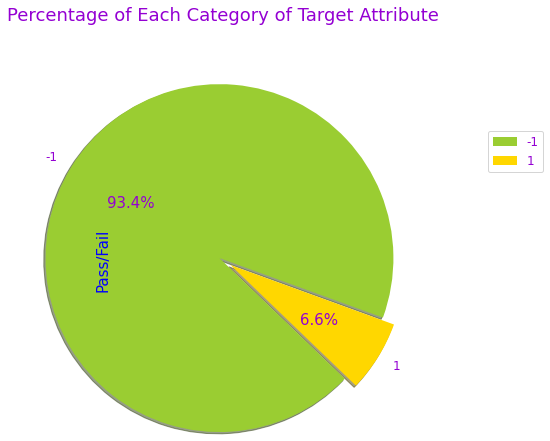

In [16]:
# Checking Value Counts of Target Attribute
print('\033[1mTable Showing Total Observations in each section of Target attribute:-')
TAC = y.value_counts().to_frame('Total Observations')
display(TAC)

# Getting Percentages of each category in Target Attribute
print('\033[1m\n\nPie Chart Showing Percentage of Each Category of Target Attribute:-')
plt.title('Percentage of Each Category of Target Attribute\n\n\n\n\n\n')
explode = (0.05, 0.1)
y.value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',colors=['yellowgreen','gold'],startangle=-20);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
plt.show()

***
**Key Observations:-**
* Target Attribute found Imbalanced.
* Class -1 is dominating by 93.4% of data.
* Class 1 covers only 6.6% of data.
***

### Fixing Target Imbalance by Synthetic Minority Oversampling Technique (SMOTE)

   SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

Table Showing Total Observations in each section of target data for SMOTE:-


__________Total Observations__________                    
                        Before Tranformation After Tranformation
-1                                      1463                1463
1                                        104                1463
Total                                   1567                2926



Pie Chart Showing Percentage of Each Category of Target Attribute:-


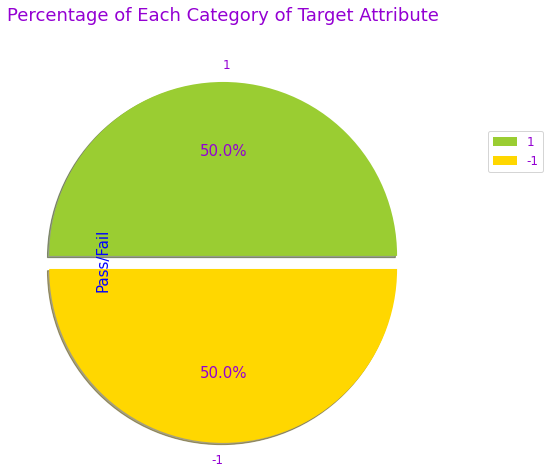

In [17]:
# Getting total observations of target attribute before transformation
yct = y.count()

# Transforming the dataset
OS = SMOTE(random_state=1)
X, y = OS.fit_resample(X, y)

# Checking Value Counts of Target Attribute after transforming
print('\033[1mTable Showing Total Observations in each section of target data for SMOTE:-') 
TAC2 = y.value_counts().to_frame('Total Observations')

# For better representation
TVC = pd.DataFrame({'Before Tranformation':TAC['Total Observations'],'After Tranformation':TAC2['Total Observations']})
total  = pd.Series({'Before Tranformation':yct,'After Tranformation':y.count()},name='Total')
TVC = TVC.append(total)
columns=[('__________Total Observations__________', 'Before Tranformation'), ('__________Total Observations__________', 
                                                                              'After Tranformation')]
TVC.columns = pd.MultiIndex.from_tuples(columns)

display(TVC)

# Getting Percentages of each category in Target Attribute

print('\033[1m\n\nPie Chart Showing Percentage of Each Category of Target Attribute:-')
plt.title('Percentage of Each Category of Target Attribute\n\n\n\n\n\n')
explode = (0.05, 0.1)
y.value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',colors=['yellowgreen','gold']);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
plt.show()

### <span style="color:#9400D3"> * Perform Train-Test Split and Standardise the Data or Vice Versa if required.

### Feature Scaling Normalization

* Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.
* We will perform scaling on Quantitative attributes.

In [18]:
# Transformation of Quantitative data
Scale = MinMaxScaler()
X = Scale.fit_transform(X)

# Displaying minimum and maximum values of Quantitative attributes
display(pd.DataFrame({'Minimum':X.min(), 'Maximum':X.max()}, index = [clm]).head())

,Minimum,Maximum
Quantitative Attributes,,
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


***
**Key Observations:-**
* Feature Scaling Normalization is successfully done.
* we have 0 as minimum and 1 as maximum values for Quantitative data.
***

###  Performing Train-Test Split.
 * The procedure involves taking a dataset and dividing it into two subsets.
 * The first subset is used to fit the model and is referred to as the training dataset. 
 * The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.
 * Here we keep 75:25 ratio i.e. 75% of data as Training set and 25% as Testing set.

In [19]:
# Here test_size is not given because by default its value is 0.25.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# For better observation of Splitted Data
TTS = pd.DataFrame({'Train':y_train.value_counts(),'Test':y_test.value_counts(),'Total Observations':y.value_counts()})
total  = pd.Series({'Train':y_train.count(),'Test':y_test.count(),'Total Observations':y.shape[0]},name='Total')
TTS = TTS.append(total)
print('\033[1mTable Showing Train-Test Split of Data:-')
display(TTS)

Table Showing Train-Test Split of Data:-


,Train,Test,Total Observations
1,1097,366,1463
-1,1097,366,1463
Total,2194,732,2926


### <span style="color:#9400D3"> * Check if the Train and Test data have similar Statistical Characteristics when compared with Original data.
    
* For Statistical Characteristics Comparison we will consider Counts, Mean, Skewness and Standard deviation as our parameter.
* Here we compare characteristics of every attribute with Original and Train and Test Data.

### Comparison of Train data with Original data

In [20]:
# Getting Statistical informations

skw1 = pd.DataFrame(skew(X),columns=['Skewness'])
skw2 = pd.DataFrame(skew(X_train),columns=['Skewness'])
X1 = pd.concat([pd.DataFrame(X).describe()[0:3].T,skw1],axis=1)
X2 = pd.concat([pd.DataFrame(X_train).describe()[0:3].T,skw2],axis=1)
Xdata = pd.concat([X1, X2], axis=1)

y1 = y.describe()[0:3].T
y2 = y_train.describe()[0:3].T
ydata = pd.concat([y1, y2],axis=1)

# Displaying Statistical Characteristics Comparison of Train data with Original data
columns1=[('______________Original Data______________', 'count'),('______________Original Data______________', 'mean'),
          ('______________Original Data______________', 'std'),('______________Original Data______________', 'Skewness'),
          ('______________X_train Data______________', 'count'),('______________X_train Data______________', 'mean'),
          ('______________X_train Data______________', 'std'),('______________X_train Data______________', 'Skewness')]
Xdata.columns = pd.MultiIndex.from_tuples(columns1)

columns2=[('Original Data', 'Pass/Fail'),('y_train Data', 'Pass/Fail')]
ydata.columns = pd.MultiIndex.from_tuples(columns2)

print('\033[1m\nTable showing Statistical Characteristics for Predictors Attributes:-')
display(Xdata)
print('_____________________________________________________________________________________\n')
print('\033[1m\nTable showing Statistical Characteristics for Target Attributes:-')
display(ydata)


Table showing Statistical Characteristics for Predictors Attributes:-


______________Original Data______________                                \
                                        count      mean       std  Skewness   
0                                      2926.0  0.474607  0.166135  0.385915   
1                                      2926.0  0.499030  0.161494 -0.145890   
2                                      2926.0  0.503734  0.161315  0.151561   
3                                      2926.0  0.383533  0.178952  0.759083   
4                                      2926.0  0.387537  0.190777  0.355974   
..                                        ...       ...       ...       ...   
469                                    2926.0  0.443193  0.160614  0.482429   
470                                    2926.0  0.492876  0.174501  0.009471   
471                                    2926.0  0.408619  0.191152  0.456893   
472                                    2926.0  0.421698  0.202576  0.627934   
473                                    2926.0  0.359123  0.195913  0.991939   

    ______________X_train Data______________                                
                                       count      mean       std  Skewness  
0                                     2194.0  0.476659  0.165498  0.356892  
1                                     2194.0  0.499721  0.162116 -0.128905  
2                                     2194.0  0.500890  0.162095  0.189790  
3                                     2194.0  0.383610  0.177896  0.769267  
4                                     2194.0  0.386079  0.191215  0.349102  
..                                       ...       ...       ...       ...  
469                                   2194.0  0.440786  0.159791  0.495694  
470                                   2194.0  0.493338  0.175247 -0.004342  
471                                   2194.0  0.405306  0.190935  0.460852  
472                                   2194.0  0.417698  0.201301  0.627201  
473                                   2194.0  0.355237  0.192895  0.954234  

[474 rows x 8 columns]

_____________________________________________________________________________________


Table showing Statistical Characteristics for Target Attributes:-


,Original Data,y_train Data
,Pass/Fail,Pass/Fail
count,2926.000000,2194.000000
mean,0.000000,0.000000
std,1.000171,1.000228


***
**Key Observations:-**
* By observing above comparision we can say that statistical characteristics of Train and Original data are almost equal
***

### Comparision of Test data with Original data

In [21]:
# Getting Statistical informations

skw1 = pd.DataFrame(skew(X),columns=['Skewness'])
skw2 = pd.DataFrame(skew(X_test),columns=['Skewness'])
X1 = pd.concat([pd.DataFrame(X).describe()[0:3].T,skw1],axis=1)
X2 = pd.concat([pd.DataFrame(X_test).describe()[0:3].T,skw2],axis=1)
Xdata = pd.concat([X1, X2], axis=1)

y1 = y.describe()[0:3].T
y2 = y_test.describe()[0:3].T
ydata = pd.concat([y1, y2],axis=1)

# Displaying Statistical Characteristics Comparison of Train data with Original data
columns1=[('______________Original Data______________', 'count'),('______________Original Data______________', 'mean'),
          ('______________Original Data______________', 'std'),('______________Original Data______________', 'Skewness'),
          ('______________X_test Data______________', 'count'),('______________X_test Data______________', 'mean'),
          ('______________X_test Data______________', 'std'),('______________X_test Data______________', 'Skewness')]
Xdata.columns = pd.MultiIndex.from_tuples(columns1)

columns2=[('Original Data', 'Pass/Fail'),('y_test Data', 'Pass/Fail')]
ydata.columns = pd.MultiIndex.from_tuples(columns2)

print('\033[1m\nTable showing Statistical Characteristics for Predictors Attributes:-')
display(Xdata)
print('_____________________________________________________________________________________\n')
print('\033[1m\nTable showing Statistical Characteristics for Target Attributes:-')
display(ydata)


Table showing Statistical Characteristics for Predictors Attributes:-


______________Original Data______________                                \
                                        count      mean       std  Skewness   
0                                      2926.0  0.474607  0.166135  0.385915   
1                                      2926.0  0.499030  0.161494 -0.145890   
2                                      2926.0  0.503734  0.161315  0.151561   
3                                      2926.0  0.383533  0.178952  0.759083   
4                                      2926.0  0.387537  0.190777  0.355974   
..                                        ...       ...       ...       ...   
469                                    2926.0  0.443193  0.160614  0.482429   
470                                    2926.0  0.492876  0.174501  0.009471   
471                                    2926.0  0.408619  0.191152  0.456893   
472                                    2926.0  0.421698  0.202576  0.627934   
473                                    2926.0  0.359123  0.195913  0.991939   

    ______________X_test Data______________                                
                                      count      mean       std  Skewness  
0                                     732.0  0.468453  0.167994  0.473325  
1                                     732.0  0.496957  0.159705 -0.200441  
2                                     732.0  0.512257  0.158759  0.037106  
3                                     732.0  0.383303  0.182203  0.730356  
4                                     732.0  0.391906  0.189521  0.378802  
..                                      ...       ...       ...       ...  
469                                   732.0  0.450406  0.162954  0.441494  
470                                   732.0  0.491489  0.172355  0.052207  
471                                   732.0  0.418548  0.191589  0.446535  
472                                   732.0  0.433687  0.206024  0.625880  
473                                   732.0  0.370771  0.204386  1.071144  

[474 rows x 8 columns]

_____________________________________________________________________________________


Table showing Statistical Characteristics for Target Attributes:-


,Original Data,y_test Data
,Pass/Fail,Pass/Fail
count,2926.000000,732.000000
mean,0.000000,0.000000
std,1.000171,1.000684


***
**Key Observations:-**
* By observing above comparision we can say that statistical characteristics of Test and Original data are almost equal
***

## <span style="color:#9400D3">5. Model Training, Testing and Tuning:

### <span style="color:#9400D3"> * Model training:

### <span style="color:#9400D3"> - Pick up a Supervised Learning Model.
* We will use Logistic Regression Model from Supervised Learning Models.

### <span style="color:#9400D3"> - Train the model.

### Logistic Regression

In [22]:
# Building Logistic Regression Model
LR = LogisticRegression()

# Fitting Logistic Regression Model on Train
LR.fit(X_train, y_train)

# Predicting on the Train and Test set
LR_Prediction_Train = LR.predict(X_train)
LR_Prediction_Test = LR.predict(X_test)

# Finding Logistic Regression Model Accuracies for Train and Test
Train_LRAC = round(metrics.accuracy_score(y_train,LR_Prediction_Train)*100,2)
Test_LRAC = round(metrics.accuracy_score(y_test,LR_Prediction_Test)*100,2)

# Displaying Logistic Regression Model Accuracies for Train and Test Data
print('\033[1mTable Showing Logistic Regression Model Accuracies for Train and Test Data:-')
display(pd.DataFrame({'Data':['Training','Testing'],'LR Accuracy (%)':[Train_LRAC,Test_LRAC]}).set_index('Data'))

Table Showing Logistic Regression Model Accuracies for Train and Test Data:-


,LR Accuracy (%)
Data,
Training,96.40
Testing,92.62


***
**Key Observations:-**
* Logistic Regression Model is Trained and Accuracies are captured.
* we got 96.44% for train data and 92.62% for test data.
***

### <span style="color:#9400D3"> - Use Cross Validation Techniques.

### k-Fold Cross Validation

In [23]:
# k-Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Evaluating Model and Displaying Accuracy and standard devviation of scores
scores = cross_val_score(LR, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('\033[1mAccuracy:-          ',round(np.mean(scores)*100,2),'%\nStandard Deviation:-',round(np.std(scores)*100,2),'%')   

Accuracy:-           92.99 %
Standard Deviation:- 1.36 %


### Repeated k-Fold Cross-Validation

In [24]:
# Repeated k-Fold Cross Validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluating Model and Displaying Accuracy and standard devviation of scores
scores = cross_val_score(LR, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('\033[1mAccuracy:-          ',round(np.mean(scores)*100,2),'%\nStandard Deviation:-',round(np.std(scores)*100,2),'%') 

Accuracy:-           93.02 %
Standard Deviation:- 1.1 %


### Stratified k-Fold Cross Validation

In [25]:
# Stratified k-Fold Cross Validation
cv = StratifiedKFold(n_splits=10, random_state=1)

# Evaluating Model and Displaying Accuracy and standard devviation of scores
scores = cross_val_score(LR, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('\033[1mAccuracy:-          ',round(np.mean(scores)*100,2),'%\nStandard Deviation:-',round(np.std(scores)*100,2),'%') 

Accuracy:-           87.23 %
Standard Deviation:- 9.41 %


### Repeated-Stratified k-Fold Cross Validation

In [26]:
# Repeated-Stratified k-Fold Cross Validation
cv = RepeatedStratifiedKFold(n_splits=10, random_state=1)

# Evaluating Model and Displaying Accuracy and standard devviation of scores
scores = cross_val_score(LR, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('\033[1mAccuracy:-          ',round(np.mean(scores)*100,2),'%\nStandard Deviation:-',round(np.std(scores)*100,2),'%') 

Accuracy:-           92.96 %
Standard Deviation:- 1.34 %


***
**Key Observations:-**
* We used 4 CV Techniques.
* Repeated-Stratified k-Fold is showing high accuracy score, with least standard deviation.
***

### <span style="color:#9400D3"> - Apply Hyper-Parameter Tuning Techniques to get the Best Accuracy.

In [35]:
# Setting up the parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Defining Grid Search with RepeatedStrtified KFold technique
Grid = dict(solver=solvers,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LR, param_grid=Grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# Getting Mean Scores, Standard Deviation along with Parameters
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
parameters = grid_result.cv_results_['params']

# Displaying Mean test scores and Standard deviations of all applied parameters
print('\033[1mTable showing Mean test scores and Standard deviations of all applied parameters:-')
hp = {'Parameters':pd.Series(parameters),'Mean Scores(%)':round(pd.Series(means)*100,4),
      'Standard Deviation(%)':round(pd.Series(stds)*100,3)}
display(pd.DataFrame(hp))
print('_____________________________________________________________________________________________\n')
print('\033[1mBest Parameter:-',grid_result.best_params_,'with Mean Score =',round(grid_result.best_score_*100,2),'%')
print('_____________________________________________________________________________________________')

Table showing Mean test scores and Standard deviations of all applied parameters:-


,Parameters,Mean Scores(%),Standard Deviation(%)
0,"{'C': 100, 'solver': 'newton-cg'}",94.9988,1.256
1,"{'C': 100, 'solver': 'lbfgs'}",94.9756,1.343
2,"{'C': 100, 'solver': 'liblinear'}",94.9874,1.182
3,"{'C': 10, 'solver': 'newton-cg'}",94.5542,1.340
4,"{'C': 10, 'solver': 'lbfgs'}",94.2465,1.369
5,"{'C': 10, 'solver': 'liblinear'}",94.4974,1.253
6,"{'C': 1.0, 'solver': 'newton-cg'}",93.1418,0.931
7,"{'C': 1.0, 'solver': 'lbfgs'}",93.0508,0.977
8,"{'C': 1.0, 'solver': 'liblinear'}",93.0507,0.941
9,"{'C': 0.1, 'solver': 'newton-cg'}",88.3913,1.557


_____________________________________________________________________________________________

Best Parameter:- {'C': 100, 'solver': 'newton-cg'} with Mean Score = 95.0 %
_____________________________________________________________________________________________


***
**Key Observations:-**
* We have done different combinations of hyperparameter tuning on logistic regression model.
* The best tuning is displayed above.
***

### <span style="color:#9400D3"> - Display and explain the classification report in detail.
  
  * A Classification Report is used to measure the quality of predictions from a classification algorithm.
  * Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.
  * Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
  * The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
  * Support is the number of actual occurrences of the class in the specified dataset.

### Classification Report for Logistic Regression Model

In [28]:
# Building Logistic Regression Model
LR = LogisticRegression(C=100,solver='newton-cg')

# Fitting Logistic Regression Model on Train
LR.fit(X_train, y_train)

# Predicting on the Train and Test set
LR_Prediction_Train = LR.predict(X_train)
LR_Prediction_Test = LR.predict(X_test)

# Finding Logistic Regression Model Accuracies for Train and Test
Train_LRAC = round(metrics.accuracy_score(y_train,LR_Prediction_Train)*100,2)
Test_LRAC = round(metrics.accuracy_score(y_test,LR_Prediction_Test)*100,2)

# Getting Classification Report for Logistic Regression Model
LRCR = metrics.classification_report(y_test,LR_Prediction_Test,output_dict=True)

# Displaying Logistic Regression Model Classification Report
print('\033[1mTable Showing Logistic Regression Model Classification Report:-')
display(pd.DataFrame(LRCR))

Table Showing Logistic Regression Model Classification Report:-


,-1,1,accuracy,macro avg,weighted avg
precision,0.987768,0.893827,0.935792,0.940797,0.940797
recall,0.882514,0.989071,0.935792,0.935792,0.935792
f1-score,0.932179,0.939040,0.935792,0.935610,0.935610
support,366.000000,366.000000,0.935792,732.000000,732.000000


***
**Key Observations:-**
* Precision of -1 is high.
* Recall is high for 1.
* F1-Score is alomost equal and balanced for both categories.
* Precision, recall and f1-score are almost same for accuracies and averages.
***

### <span style="color:#9400D3"> - Apply the above steps for all possible models that you have learnt so far.
  **List of different Models Applied to our Data:-**
  1. DecisionTreeClassifier('gini')
  2. DecisionTreeClassifier('entropy')
  3. RandomForestClassifier('gini')
  4. RandomForestClassifier('entropy')
  5. LogisticRegression()
  6. GaussianNB()
  7. SVC('rbf')
  8. SVC('linear')
  9. KNeighborsClassifier()

In [29]:
# Creating list of pre-checked models with best parameters
models = [DecisionTreeClassifier(),DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=5),RandomForestClassifier(),
          RandomForestClassifier(criterion='entropy',n_estimators=50, random_state=1, max_depth=7, max_features=12),
          LogisticRegression(random_state=1,C=100), GaussianNB(),SVC(gamma='auto',random_state=1,C=10),
          SVC(kernel='linear',gamma='auto',random_state=1,C=50), KNeighborsClassifier(metric='euclidean',n_neighbors=20)]
Train_Accuracy = []
Test_Accuracy = []

# Training models and getting accuracies for Train and Test Data
for i in models:
    i.fit(X_train,y_train)
    Train_Accuracy.append(round(i.score(X_train,y_train),4)*100)
    Test_Accuracy.append(round(i.score(X_test,y_test),4)*100)    

***
**Key Observations:-**
* Here we have applied 9 different tuning techniques.
* All the possible Tuning Techniques are applied for the data and Accuracies for Train and Test data are captured.
***

### <span style="color:#9400D3"> * Display and Compare all the Models designed with their Train and Test accuracies.

### Displaying Accuracies of Train and Test data for above Trained Models

In [30]:
# Displaying Accuracies of Train and Test Data for trained models
print('\033[1mTable Showing Accuracies of Train and Test Data from Varius Algorithms:-')
model = ['Decision Tree Classifier(gini)','Decision Tree Classifier(entropy)','Random Forest Classifier(gini)',
         'Random Forest Classifier(entropy)','Logistic Regression','Gaussian Naive Bayes','Support Vector Classifier(rbf)',
         'Support Vector Classifier(linear)','K-Neighbors Classifier']
all_models2 = pd.DataFrame({'Trained Model':model,'Train Accuracy (%)':Train_Accuracy,'Test Accuracy (%)':Test_Accuracy}
                         ).set_index('Trained Model')
display(all_models2)

Table Showing Accuracies of Train and Test Data from Varius Algorithms:-


,Train Accuracy (%),Test Accuracy (%)
Trained Model,,
Decision Tree Classifier(gini),100.00,87.43
Decision Tree Classifier(entropy),88.83,80.87
Random Forest Classifier(gini),100.00,98.36
Random Forest Classifier(entropy),99.00,96.99
Logistic Regression,100.00,93.44
Gaussian Naive Bayes,88.88,87.98
Support Vector Classifier(rbf),94.67,93.44
Support Vector Classifier(linear),100.00,93.85
K-Neighbors Classifier,53.28,52.60


***
**Key Observations:-**
* In most models train accuracy are almost eaual to test accuracy.
* RandomForest Classifier(gini) has highest accuracy when compared to other models.
***

### <span style="color:#9400D3"> * Select the Final Best Trained Model along with your detailed comments for selecting this model.
    
Based on above results, RandomForest Classifier(gini) has highest accuracies for train and test data.

### Checking Classification Report for RandomForest Classifier(gini)

In [31]:
# Getting Classification Report for RandomForest Classifier(gini) Model
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_Predict = RF.predict(X_test)
RFCR = metrics.classification_report(y_test, RF_Predict, output_dict=True)

# Displaying RandomForest Classifier(gini) Model Classification Report
print('\033[1m\nTable Showing RandomForest Classifier(gini) Model Classification Report:-')
display(pd.DataFrame(RFCR))


Table Showing RandomForest Classifier(gini) Model Classification Report:-


,-1,1,accuracy,macro avg,weighted avg
precision,0.965608,0.997175,0.980874,0.981392,0.981392
recall,0.997268,0.964481,0.980874,0.980874,0.980874
f1-score,0.981183,0.980556,0.980874,0.980869,0.980869
support,366.000000,366.000000,0.980874,732.000000,732.000000


***
**Comments:-**
* Here Precision of class 1 is little higher than class -1, whereas in recall its vice-versa.
* But we hava a well balanced f1-score, which is good.
* All three accuracies are almost equal.
* Accuracy we saw as highest among all.

By observing above data, we select the **RandomForest Classifier (gini)** as our Final Best Trained Model.

### <span style="color:#9400D3"> * Pickle the selected model for future use.
Pickle is the standard way of serializing objects in Python.

### Method 1: Saving the Model in SAV File

Here we create a SAV file and save our Model in it.

In [32]:
# Creating file name
Pickle_file = 'PickleFile.sav'

# Saving the Final best trained Random Forest model to the file
pickle.dump(RF, open(Pickle_file, 'wb'))            # Here we use "dump"
  
# Loading the Pickle File to get Random Forest Model
RF_model1 = pickle.load(open(Pickle_file, 'rb'))    # Here we use "load"
  
# Checking the loaded model by finding accuracies
Train_AC = round(RF_model1.score(X_train , y_train),4)*100
Test_AC = round(RF_model1.score(X_test , y_test),4)*100

print('\033[1mTable Showing Random Forest Classifier Model Accuracies for Train and Test Data:-')
display(pd.DataFrame({'Data':['Training','Testing'],'Random Forest Classifier Accuracy (%)':
                      [Train_AC,Test_AC]}).set_index('Data'))

Table Showing Random Forest Classifier Model Accuracies for Train and Test Data:-


,Random Forest Classifier Accuracy (%)
Data,
Training,100.00
Testing,98.09


### Method 2: Saving the Model in a Variable

Incase if the above method fails due to error in loading file, you can check this method.

In [33]:
# Saving the Final best trained Random Forest model to a Variabe
Pickle_model = pickle.dumps(RF)                # Here we use "dumps" NOT "dump"
   
# Loading the Pickle Model
RF_model2 = pickle.loads(Pickle_model)         # Here we use "loads" NOT "load"
  
# Checking the loaded model by finding accuracies
Train_AC = round(RF_model2.score(X_train , y_train),4)*100
Test_AC = round(RF_model2.score(X_test , y_test),4)*100

print('\033[1mTable Showing Random Forest Classifier Model Accuracies for Train and Test Data:-')
display(pd.DataFrame({'Data':['Training','Testing'],'Random Forest Classifier Accuracy (%)':
                      [Train_AC,Test_AC]}).set_index('Data'))

Table Showing Random Forest Classifier Model Accuracies for Train and Test Data:-


,Random Forest Classifier Accuracy (%)
Data,
Training,100.00
Testing,98.09


## <span style="color:#9400D3">6. Conclusion and Improvisation:

* The Data had some Null values in the beginning, they are removed.
* All the relevant modifications are done.
* Data analysis and visualization is done.
* We selected logistic regression model, and we had done hyperparameter tunings.
* Accuracies are displayed accordingly.
* We used some of best models and their accuracies are captured.
* We selected the best model at the end.

# <span style="color:#9400D3">--------------------- End of AIML MODULE PROJECT 2 ---------------------

In [36]:
!jupyter nbconvert --to html AIML_MODULE_PROJECT_5.ipynb

[NbConvertApp] Converting notebook AIML_MODULE_PROJECT_5.ipynb to html
[NbConvertApp] Writing 905560 bytes to AIML_MODULE_PROJECT_5.html
